In [52]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

# $\mathbf{T}$ recovery

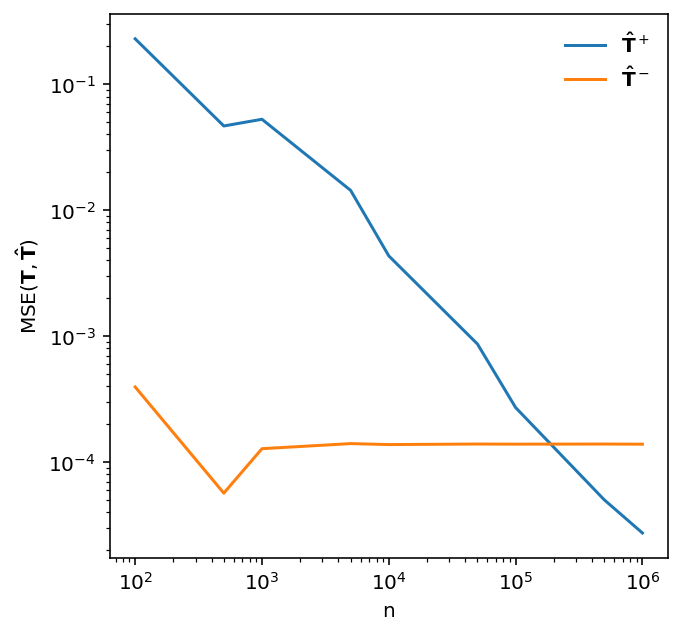

In [53]:
T_pos_rec = [
    0.22980751323058343,
    0.046693726039088904,
    0.05276126380822768,
    0.014378692061484963,
    0.004339236620468348,
    0.0008666625986995954,
    0.0002710274081052076,
    5.01737349371256e-05,
    2.7357819184983637e-05,
]
T_neg_rec = [
    0.00039516225651373225,
    5.6715994661184826e-05,
    0.00012779623491192247,
    0.00014026676522038765,
    0.00013777243863153144,
    0.00013916241547779395,
    0.0001388476719750248,
    0.0001391368972697192,
    0.00013874273685093952,
] # For theta_star = np.array([0.6, 0.3, 0.8])
ns = [
    100, 
    500, 
    1_000, 
    5_000, 
    10_000, 
    50_000,
    100_000,
    500_000,
    1_000_000,
    ]

T_pos_rec = np.array(T_pos_rec)
T_neg_rec = np.array(T_neg_rec)
ns = np.array(ns)

# Plotting
plt.figure(figsize=(5, 5))
plt.plot(ns, T_pos_rec, label=r'$\mathbf{\hat{T}}^+$')
plt.plot(ns, T_neg_rec, label=r'$\mathbf{\hat{T}}^-$')
plt.xscale('log')
plt.xlabel('n')
plt.yscale('log')
plt.ylabel(r'MSE$(\mathbf{T}, \mathbf{\hat{T}})$')
plt.legend(frameon=False)
plt.show()

# $\mathbb{E}[d^2(\mathbf{\lambda}_a, \mathbf{y}])]$ recovery

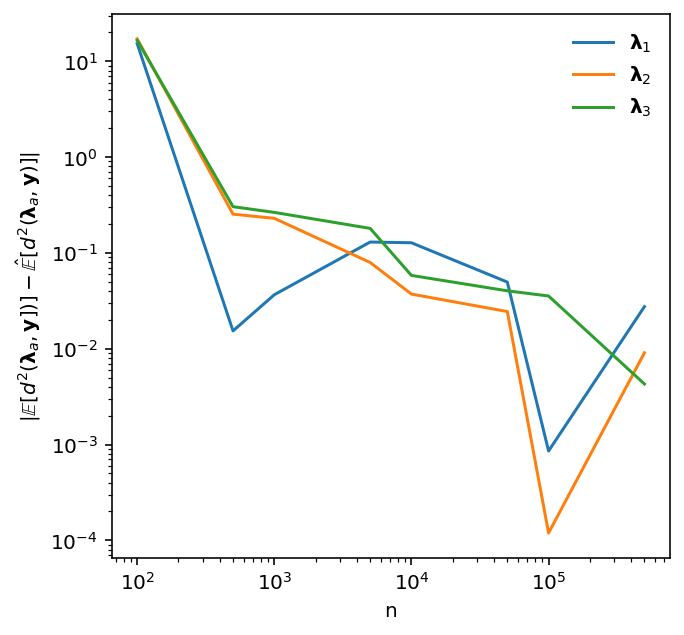

In [54]:
mu_rec = np.array([
    [15.29921335, 17.14940888, 16.52723871],
    [0.01533473, 0.25375425, 0.30359709],
    [0.0365781, 0.22938574, 0.264628],
    [0.1297748,  0.07940054, 0.18008856],
    [0.12751129, 0.03714572, 0.05818283],
    [0.04958745, 0.02443144, 0.0401845 ],
    [0.00085625, 0.00011929, 0.03548798],
    [0.02749702, 0.0090668,  0.00428183],
]) # For theta_star = np.array([0.6, 0.99, 0.8])


ns = np.array([
    100, 
    500, 
    1_000, 
    5_000, 
    10_000, 
    50_000,
    100_000,
    500_000,
    ])

T_pos_rec = np.array(T_pos_rec)
T_neg_rec = np.array(T_neg_rec)
ns = np.array(ns)

# Plotting
plt.figure(figsize=(5, 5))
plt.plot(ns, mu_rec[:, 0], label=r'$\mathbf{\lambda}_1$')
plt.plot(ns, mu_rec[:, 1], label=r'$\mathbf{\lambda}_2$')
plt.plot(ns, mu_rec[:, 2], label=r'$\mathbf{\lambda}_3$')

plt.xscale('log')
plt.xlabel('n')
plt.yscale('log')
plt.ylabel(r'$\|\mathbb{E}[d^2(\mathbf{\lambda}_a, \mathbf{y}])] - \hat{\mathbb{E}}[d^2( \mathbf{\lambda}_a, \mathbf{y} )]  \|$')
plt.legend(frameon=False)
plt.show()

# Plotting with error bars

In [55]:
import os
import ast

def get_res(fname, basedir='../code/results/ranking'):
    with open(os.path.join(basedir, fname)) as f:
        # Get Ts and expected values
        Ts = []
        Evs = []
        Evs_uws = []
        for line in f.readlines():
            if 'population -- TD(sampled)' in line:
                Ts.append(float(line.split('\t')[-1].strip()))
            elif 'err(exp_sq_dist_pop, exp_sq_dist_TD)' in line:
                Evs.append(ast.literal_eval(
                    line.split('\t')[-1].strip().replace('  ', ',').replace(' ', ',')))
            elif 'err(exp_sq_dist_pop, exp_sq_dist_UWS)' in line:
                Evs_uws.append(ast.literal_eval(
                    line.split('\t')[-1].strip().replace('  ', ',').replace(' ', ',')))
    return Ts, Evs, Evs_uws

Gathering results...

In [56]:
ns = ['100', '500', '1_000', '5_000', '10_000', '50_000', '100_000', '500_000', '1_000_000']
seedmax = 10 # TODO
seeds = np.arange(seedmax) # TODO change seedmax

Ts_seeds = []
Evs_seeds = []
Evs_uws_seeds = []
for seed in seeds:
    Ts = []
    Evs = []
    Ev_uwss = []
    for n in ns:
        T, Ev, Ev_u = get_res(f'n{n}_seed{seed}.log')
        Ts.append(T)
        Evs.append(Ev)
        Ev_uwss.append(Ev_u)
    Ts_seeds.append(Ts)
    Evs_seeds.append(Evs)
    Evs_uws_seeds.append(Ev_uwss)
Ts_seeds = np.array(Ts_seeds)
Evs_seeds = np.array(Evs_seeds)[:, :, 0, :]
Evs_uws_seeds = np.array(Evs_uws_seeds)[:, :, 0, :]

Plotting

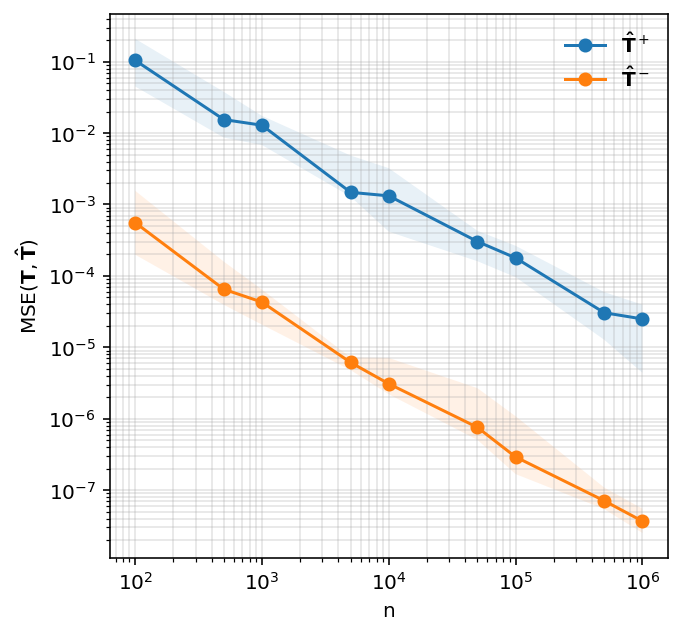

In [57]:
# Plotting
plt.figure(figsize=(5, 5))

ns = [int(n) for n in ns]

q = 0.25
mean0 = np.median(Ts_seeds, axis=0)[:, 0]
max0 = np.quantile(Ts_seeds, 1.0 - q, axis=0)[:, 0]
min0 = np.quantile(Ts_seeds, q, axis=0)[:, 0]
plt.plot(ns, mean0, label=r'$\mathbf{\hat{T}}^+$', marker='o')
plt.fill_between(ns, min0, max0, alpha=0.1)

mean1 = np.median(Ts_seeds, axis=0)[:, 1]
max1 = np.quantile(Ts_seeds, 1.0 - q, axis=0)[:, 1]
min1 = np.quantile(Ts_seeds, q, axis=0)[:, 1]
plt.plot(ns, mean1, label=r'$\mathbf{\hat{T}}^-$', marker='o')
plt.fill_between(ns, min1, max1, alpha=0.1)

plt.xscale('log')
plt.xlabel('n')
plt.yscale('log')
plt.ylabel(r'MSE$(\mathbf{T}, \mathbf{\hat{T}})$')
plt.legend(frameon=False)
plt.grid(True, which="both", ls="-", alpha=0.3, color='0.65')
plt.show()

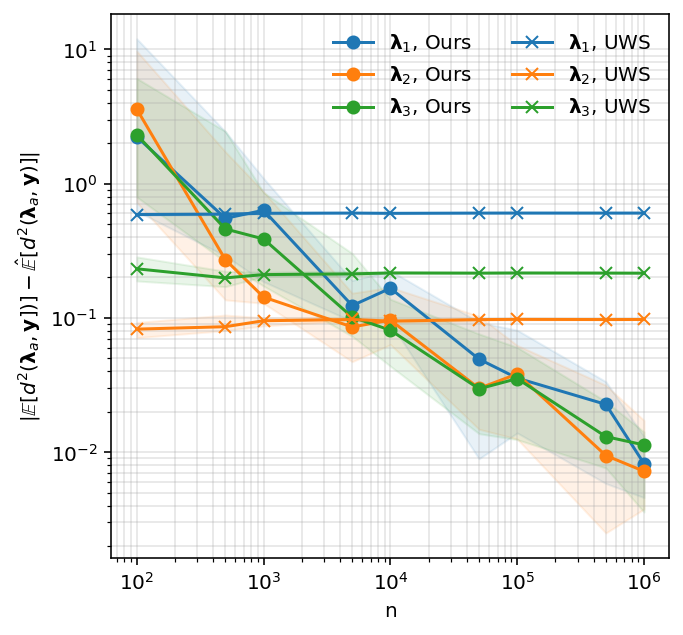

In [58]:
# Plotting
plt.figure(figsize=(5, 5))

ns = [int(n) for n in ns]

q = 0.25
#### TD
mean0 = np.median(Evs_seeds, axis=0)[:, 0]
max0 = np.quantile(Evs_seeds, 1.0 - q, axis=0)[:, 0]
min0 = np.quantile(Evs_seeds, q, axis=0)[:, 0]
plt.plot(ns, mean0, label=r'$\mathbf{\lambda}_1$, Ours', marker='o', color='C0')
plt.fill_between(ns, min0, max0, alpha=0.1, color='C0')

mean1 = np.median(Evs_seeds, axis=0)[:, 1]
max1 = np.quantile(Evs_seeds, 1.0 - q, axis=0)[:, 1]
min1 = np.quantile(Evs_seeds, q, axis=0)[:, 1]
plt.plot(ns, mean1, label=r'$\mathbf{\lambda}_2$, Ours', marker='o', color='C1')
plt.fill_between(ns, min1, max1, alpha=0.1, color='C1')

mean2 = np.median(Evs_seeds, axis=0)[:, 2]
max2 = np.quantile(Evs_seeds, 1.0 - q, axis=0)[:, 2]
min2 = np.quantile(Evs_seeds, q, axis=0)[:, 2]
plt.plot(ns, mean2, label=r'$\mathbf{\lambda}_3$, Ours', marker='o', color='C2')
plt.fill_between(ns, min2, max2, alpha=0.1, color='C2')

#### UWS
mean0 = np.median(Evs_uws_seeds, axis=0)[:, 0]
max0 = np.quantile(Evs_uws_seeds, 1.0 - q, axis=0)[:, 0]
min0 = np.quantile(Evs_uws_seeds, q, axis=0)[:, 0]
plt.plot(ns, mean0, label=r'$\mathbf{\lambda}_1$, UWS', marker='x', color='C0')
plt.fill_between(ns, min0, max0, alpha=0.1, color='C0')

mean1 = np.median(Evs_uws_seeds, axis=0)[:, 1]
max1 = np.quantile(Evs_uws_seeds, 1.0 - q, axis=0)[:, 1]
min1 = np.quantile(Evs_uws_seeds, q, axis=0)[:, 1]
plt.plot(ns, mean1, label=r'$\mathbf{\lambda}_2$, UWS', marker='x', color='C1')
plt.fill_between(ns, min1, max1, alpha=0.1, color='C1')

mean2 = np.median(Evs_uws_seeds, axis=0)[:, 2]
max2 = np.quantile(Evs_uws_seeds, 1.0 - q, axis=0)[:, 2]
min2 = np.quantile(Evs_uws_seeds, q, axis=0)[:, 2]
plt.plot(ns, mean2, label=r'$\mathbf{\lambda}_3$, UWS', marker='x', color='C2')
plt.fill_between(ns, min2, max2, alpha=0.1, color='C2')



plt.xscale('log')
plt.xlabel('n')
plt.yscale('log')
plt.ylabel(r'$\|\mathbb{E}[d^2(\mathbf{\lambda}_a, \mathbf{y}])] - \hat{\mathbb{E}}[d^2( \mathbf{\lambda}_a, \mathbf{y} )]  \|$')
plt.legend(frameon=False, ncol=2)
plt.grid(True, which="both", ls="-", alpha=0.3, color='0.65')
plt.show()